<a href="https://colab.research.google.com/github/Ignacioruuizm/EDA_FundamentosML_IgnacioRuiz/blob/main/Prueba1_CORRECCI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prueba 1: FUNDAMENTOS MACHINE LEARNING** Ignacio Ruiz

Introducción

En este análisis se encontraran diversos aspectos del conjunto de datos que proporcionan una visión detallada sobre el comportamiento de los clientes de una empresa a través de un análisis exploratorio de datos (EDA)

Este análisis proporcionará una visión integral de cómo diferentes factores impactan en el comportamiento de compra de los clientes y cómo se pueden usar estos datos para mejorar la segmentación y las estrategias de marketing.

**Inicio y carga de datos**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

CARGA DEL DATASET

In [3]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

1. EXPLORACIÓN INICIAL Y TIPOS DE DATOS


In [76]:
# Información general del dataset
print("\n-Información general del dataset-")
summary = df.dtypes.to_frame(name='Tipo de dato')
summary['Valores No Nulos'] = df.notnull().sum()
summary['Valores Nulos'] = df.isnull().sum()
summary['Total de Valores'] = len(df)
print(summary)

# Estadística básica
print("\n -Estadísticas  básicas- ")
print(df.describe(include='all').transpose())

# Verificación de valores nulos
print("\n-Valores nulos por columna (cantidad y porcentaje)- ")
nulls = df.isnull().sum().to_frame(name='Nulos')
nulls['porcentaje (%)'] = (nulls['Nulos'] / len(df)) * 100
print(nulls)



-Información general del dataset-
                       Tipo de dato  Valores No Nulos  Valores Nulos  \
ID                            int64              2240              0   
Year_Birth                    int64              2240              0   
Education                  category              2240              0   
Marital_Status             category              2240              0   
Income                      float64              2240              0   
Kidhome                       int64              2240              0   
Teenhome                      int64              2240              0   
Dt_Customer          datetime64[ns]              2240              0   
Recency                       int64              2240              0   
MntWines                      int64              2240              0   
MntFruits                     int64              2240              0   
MntMeatProducts               int64              2240              0   
MntFishProducts              

1.1 IDENTIFICACIÓN Y CLASIFICACIÓN DE VARIABLES

In [9]:
print("\nClasificación de variables ")

# Identifica variables numéricas y categóricas
vars_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
vars_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Clasifica numéricas entre continuas y discretas
numericas_discretas = [col for col in vars_numericas if df[col].nunique() < 15]
numericas_continuas = [col for col in vars_numericas if col not in numericas_discretas]

categoricas_nominales = vars_categoricas
categoricas_ordinales = []

# Muestra resultados
print(f"Variables numéricas discretas ({len(numericas_discretas)}): {numericas_discretas}")
print(f"Variables numéricas continuas ({len(numericas_continuas)}): {numericas_continuas}")
print(f"Variables categóricas nominales ({len(categoricas_nominales)}): {categoricas_nominales}")
print(f"Variables categóricas ordinales ({len(categoricas_ordinales)}): {categoricas_ordinales}")

# Convierte variables categóricas al tipo category
df[categoricas_nominales + categoricas_ordinales] = df[categoricas_nominales + categoricas_ordinales].astype('category')



Clasificación de variables 
Variables numéricas discretas (13): ['Kidhome', 'Teenhome', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Variables numéricas continuas (13): ['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
Variables categóricas nominales (3): ['Education', 'Marital_Status', 'Dt_Customer']
Variables categóricas ordinales (0): []


1.2 PREPROCESAMIENTO BÁSICO DE DATOS

In [80]:
print("\n--- Tratamiento de valores nulos y variables derivadas ---")

# Muestra columnas con valores nulos
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
if not missing_cols.empty:
    print("\nColumnas con valores nulos:")
    print(missing_cols)
else:
    print("\nNo se encontraron valores nulos.")

# Valores nulos en la columna 'income' con la mediana
if 'Income' in missing_cols:
    median_income = df['Income'].median()
    df['Income'].fillna(median_income, inplace=True)
    print(f"\nSe imputaron valores nulos en 'Income' con la mediana: {median_income}")


# Calcula gasto total por cliente
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds']
df['TotalSpent'] = df[mnt_cols].sum(axis=1)

# Calcula número total de hijos
df['TotalChildren'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

# Calcula número total de compras
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

# Calcula número total de campañas aceptadas
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['NumAcceptedCmps'] = df[cmp_cols].sum(axis=1)

# Verificación final
total_missing = df.isnull().sum().sum()
print(f"\nTotal de valores nulos restantes: {total_missing}")



--- Tratamiento de valores nulos y variables derivadas ---

No se encontraron valores nulos.

Total de valores nulos restantes: 0


In [ ]:
# Procesamiento de fechas
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
reference_date = pd.Timestamp('2015-01-01')
df['Customer_Since_Days'] = (reference_date - df['Dt_Customer']).dt.days

In [14]:
# Calcula edad del cliente
df['Age'] = reference_date.year - df['Year_Birth']

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') #convierte dt customer de date a fecha y hora

In [17]:
df['Días_Activos'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days
# Calcula los días desde la inscripción hasta hoy

2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO

2.1 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN DE VARIABLES NUMÉRICAS

In [74]:
# Lista de variables numéricas clave
variables_numericas = [
    'Age', 'Income', 'TotalChildren', 'TotalSpent',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'Recency',
    'NumWebVisitsMonth', 'TotalPurchases', 'NumAcceptedCmps'
]

# Genera estadísticas descriptivas detalladas
print("\n Estadísticas para variables numéricas ")
resumen = df[variables_numericas].describe(
    percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
).T

# Cálculo adicional coeficiente de variación, asimetría y curtosis
resumen['Coef_Variacion'] = resumen['std'] / resumen['mean']
resumen['Asimetria'] = df[variables_numericas].skew()
resumen['Curtosis'] = df[variables_numericas].kurtosis()
resumen = resumen.round(2)

# Muestra tabla final
print(resumen)

# Cálculo de la moda para cada variable
print("\n Moda por variable")

from scipy import stats

def calcular_moda(serie):
    resultado = stats.mode(serie, nan_policy='omit', keepdims=False)
    moda_valor = resultado.mode
    if isinstance(moda_valor, (int, float, np.integer, np.floating)):
        return moda_valor
    elif hasattr(moda_valor, '__len__') and len(moda_valor) > 0:
        return moda_valor[0]
    else:
        return np.nan

modas = {col: calcular_moda(df[col]) for col in variables_numericas}
for var, moda in modas.items():
    print(f"{var}: {moda}")

# Evaluación de distribución sesgo y forma
print("\n Distribución de variables clave")

variables_clave = ['Age', 'Income', 'TotalSpent', 'NumAcceptedCmps']
for variable in variables_clave:
    skew_val = df[variable].skew()
    kurt_val = df[variable].kurtosis()

    print(f"{variable}:")
    print(f"  - Asimetría: {skew_val:.2f}", end=" → ")
    if skew_val > 0.5:
        print("Sesgo positivo (cola derecha)")
    elif skew_val < -0.5:
        print("Sesgo negativo (cola izquierda)")
    else:
        print("Distribución simétrica")

    print(f"  - Curtosis: {kurt_val:.2f}", end=" → ")
    if kurt_val > 0.5:
        print("Leptocúrtica (pico alto)")
    elif kurt_val < -0.5:
        print("Platicúrtica (pico bajo)")
    else:
        print("Mesocúrtica (forma normal)")
    print()



 Estadísticas para variables numéricas 
                    count      mean       std     min       1%        5%  \
Age                2240.0     46.19     11.98    19.0    23.00     27.00   
Income             2240.0  52237.98  25037.96  1730.0  7705.92  19101.05   
TotalChildren      2240.0      0.95      0.75     0.0     0.00      0.00   
TotalSpent         2240.0    605.80    602.25     5.0    13.00     22.00   
MntWines           2240.0    303.94    336.60     0.0     1.00      3.00   
MntFruits          2240.0     26.30     39.77     0.0     0.00      0.00   
MntMeatProducts    2240.0    166.95    225.72     0.0     2.00      4.00   
MntFishProducts    2240.0     37.53     54.63     0.0     0.00      0.00   
MntSweetProducts   2240.0     27.06     41.28     0.0     0.00      0.00   
Recency            2240.0     49.11     28.96     0.0     0.00      4.00   
NumWebVisitsMonth  2240.0      5.32      2.43     0.0     1.00      1.00   
TotalPurchases     2240.0     14.86      7.68  

In [67]:
def get_mode(serie):
    return serie.mode().iloc[0] if not serie.mode().empty else None


2.2 ANÁLISIS VARIABLES CATEGÓRICAS

In [31]:
print("\n Exploración de variables categóricas")

# Función para mostrar frecuencias y moda de una variable categórica
def explorar_variable_categorica(columna):
    conteo = df[columna].value_counts()
    porcentaje = df[columna].value_counts(normalize=True).mul(100).round(2)
    resumen = pd.concat([conteo, porcentaje], axis=1, keys=['Frecuencia', 'Porcentaje (%)'])
    print(f"\n Distribución de '{columna}':")
    print(resumen)
    print(f"Moda: '{conteo.idxmax()}' con {conteo.max()} apariciones")

# Define las variables categóricas nominales
categoricas_nominales = ['Education', 'Marital_Status', 'Dt_Customer']

# Itera sobre todas las variables categóricas nominales
for variable in categoricas_nominales:
    explorar_variable_categorica(variable)

#  Análisis de variables binarias
print("\n Variables binarias relacionadas a campañas y reclamos")

# Define las variables binarias relacionadas con las campañas y quejas
binary_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
               'AcceptedCmp5', 'Response', 'Complain']

# Crea resumen de variables binarias número y porcentaje de 1s
resumen_binarias = []
for col in binary_vars:
    total_positivos = df[col].sum()
    porcentaje = round((total_positivos / df.shape[0]) * 100, 2)
    resumen_binarias.append((col, total_positivos, porcentaje))

# Convierte a dataframe para verlo
df_binarias = pd.DataFrame(resumen_binarias, columns=['Variable', 'Total_1', 'Porcentaje_1 (%)'])
df_binarias.set_index('Variable', inplace=True)

print(df_binarias)




 Exploración de variables categóricas

 Distribución de 'Education':
            Frecuencia  Porcentaje (%)
Education                             
Graduation        1127           50.31
PhD                486           21.70
Master             370           16.52
2n Cycle           203            9.06
Basic               54            2.41
Moda: 'Graduation' con 1127 apariciones

 Distribución de 'Marital_Status':
                Frecuencia  Porcentaje (%)
Marital_Status                            
Married                864           38.57
Together               580           25.89
Single                 480           21.43
Divorced               232           10.36
Widow                   77            3.44
Alone                    3            0.13
Absurd                   2            0.09
YOLO                     2            0.09
Moda: 'Married' con 864 apariciones

 Distribución de 'Dt_Customer':
             Frecuencia  Porcentaje (%)
Dt_Customer                            
20

3. VISUALIZACION PARA EL ANÁLISIS

3.1 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CLAVE

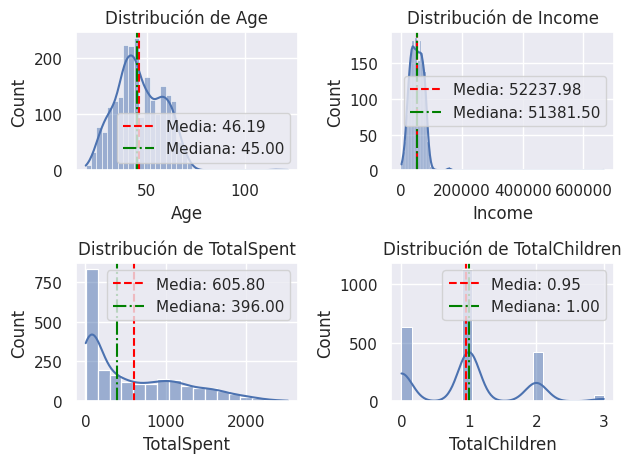

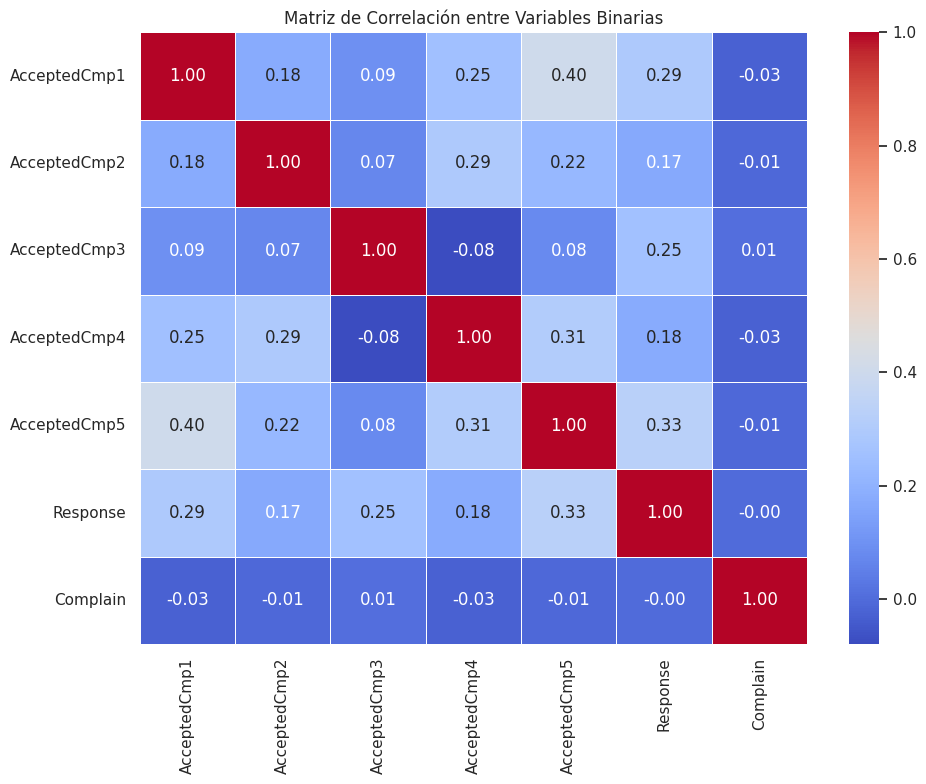

In [44]:
# DISTRIBUCION DE VARIABLES NUMERICAS IMPORTANTES
key_vars = ['Age', 'Income', 'TotalSpent', 'TotalChildren']
for i, var in enumerate(key_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    plt.axvline(df[var].median(), color='green', linestyle='-.', label=f'Mediana: {df[var].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.savefig('distribuciones_numericas.png')
plt.show()

print("\n ")
binary_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
binary_corr_matrix = df[binary_vars].corr()

# MUESTRA LA MATRIZ DE CORRELACION
plt.figure(figsize=(10, 8))
sns.heatmap(binary_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Binarias')
plt.tight_layout()
plt.show()



3.2 ANÁLISIS DE CANTIDAD DE VISITAS AL SITIO WEB

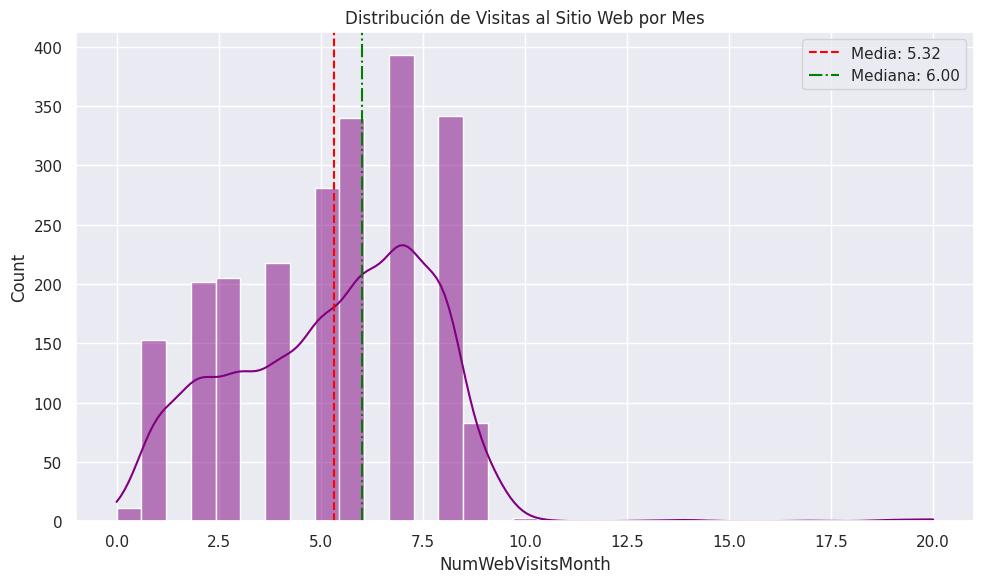

In [33]:
# DISTRIBUCION DE CANTIDAD DE VISITAS AL SITIO WEB POR MES
plt.figure(figsize=(10, 6))
sns.histplot(df['NumWebVisitsMonth'], kde=True, color='purple')
plt.title('Distribución de Visitas al Sitio Web por Mes')
plt.axvline(df['NumWebVisitsMonth'].mean(), color='red', linestyle='--', label=f'Media: {df["NumWebVisitsMonth"].mean():.2f}')
plt.axvline(df['NumWebVisitsMonth'].median(), color='green', linestyle='-.', label=f'Mediana: {df["NumWebVisitsMonth"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('distribucion_visitas_sitio.png')
plt.show()


3.3 ANÁLISIS GASTO POR TIPO DE PRODUCTO

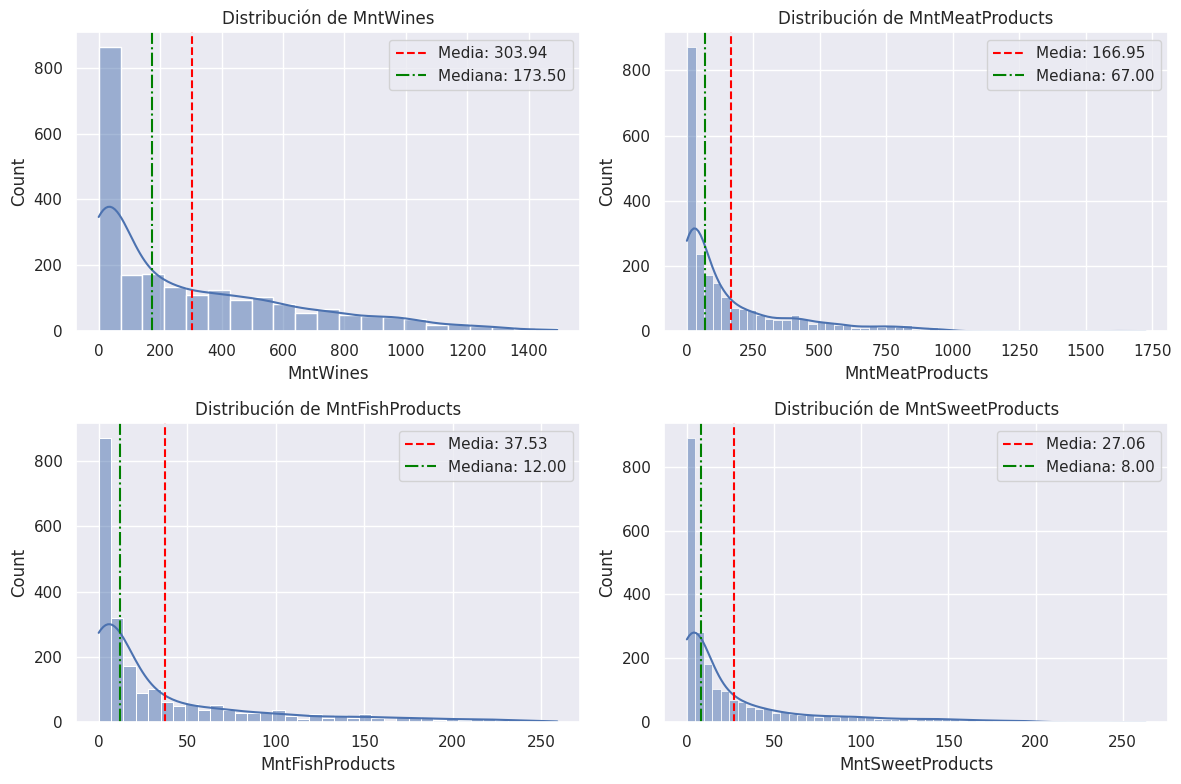

In [34]:
# DISTRIBUCION DEL GASTO EN PRODUCTOS
plt.figure(figsize=(12, 8))
spending_vars = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
for i, var in enumerate(spending_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.axvline(df[var].mean(), color='red', linestyle='--', label=f'Media: {df[var].mean():.2f}')
    plt.axvline(df[var].median(), color='green', linestyle='-.', label=f'Mediana: {df[var].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.savefig('distribuciones_gasto_productos.png')
plt.show()


3.4 ANÁLISIS DE TOTAL DE COMPRAS

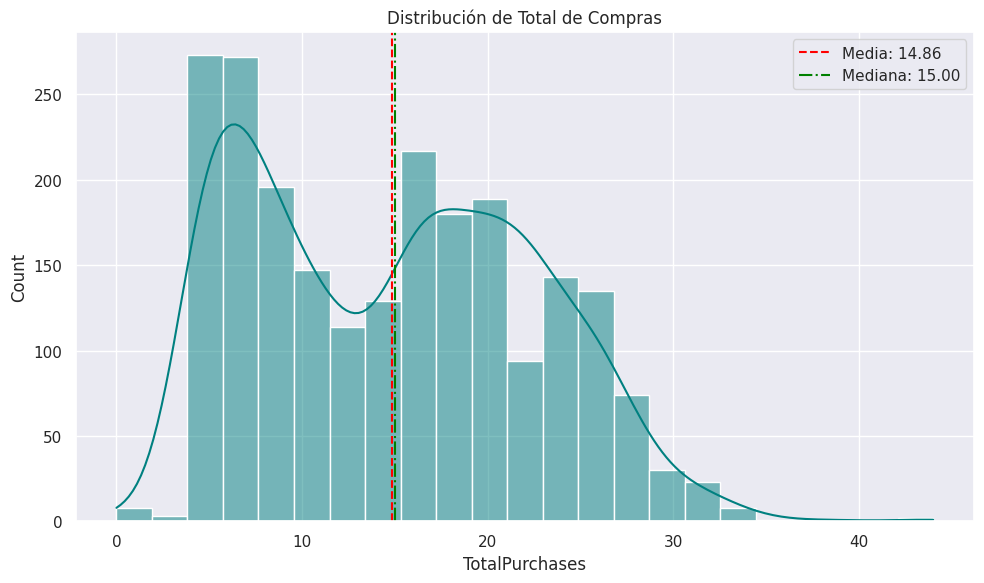

In [36]:
# HISTOGRAMA DE TOTAL DE COMPRAS
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPurchases'], kde=True, color='teal')
plt.title('Distribución de Total de Compras')
plt.axvline(df['TotalPurchases'].mean(), color='red', linestyle='--', label=f'Media: {df["TotalPurchases"].mean():.2f}')
plt.axvline(df['TotalPurchases'].median(), color='green', linestyle='-.', label=f'Mediana: {df["TotalPurchases"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('distribucion_compras.png')
plt.show()


3.5 ANÁLISIS VALORES ATÍPICOS


Outliers detectados en 'Age' usando Z-score:
192    115
239    122
339    116
Name: Age, dtype: int64

Outliers detectados en 'Income' usando Z-score:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

Outliers detectados en 'TotalSpent' usando Z-score:
987     2486
1052    2440
1179    2525
1492    2524
1572    2525
Name: TotalSpent, dtype: int64

Outliers detectados en 'TotalPurchases' usando Z-score:
21     43
432    39
687    44
Name: TotalPurchases, dtype: int64


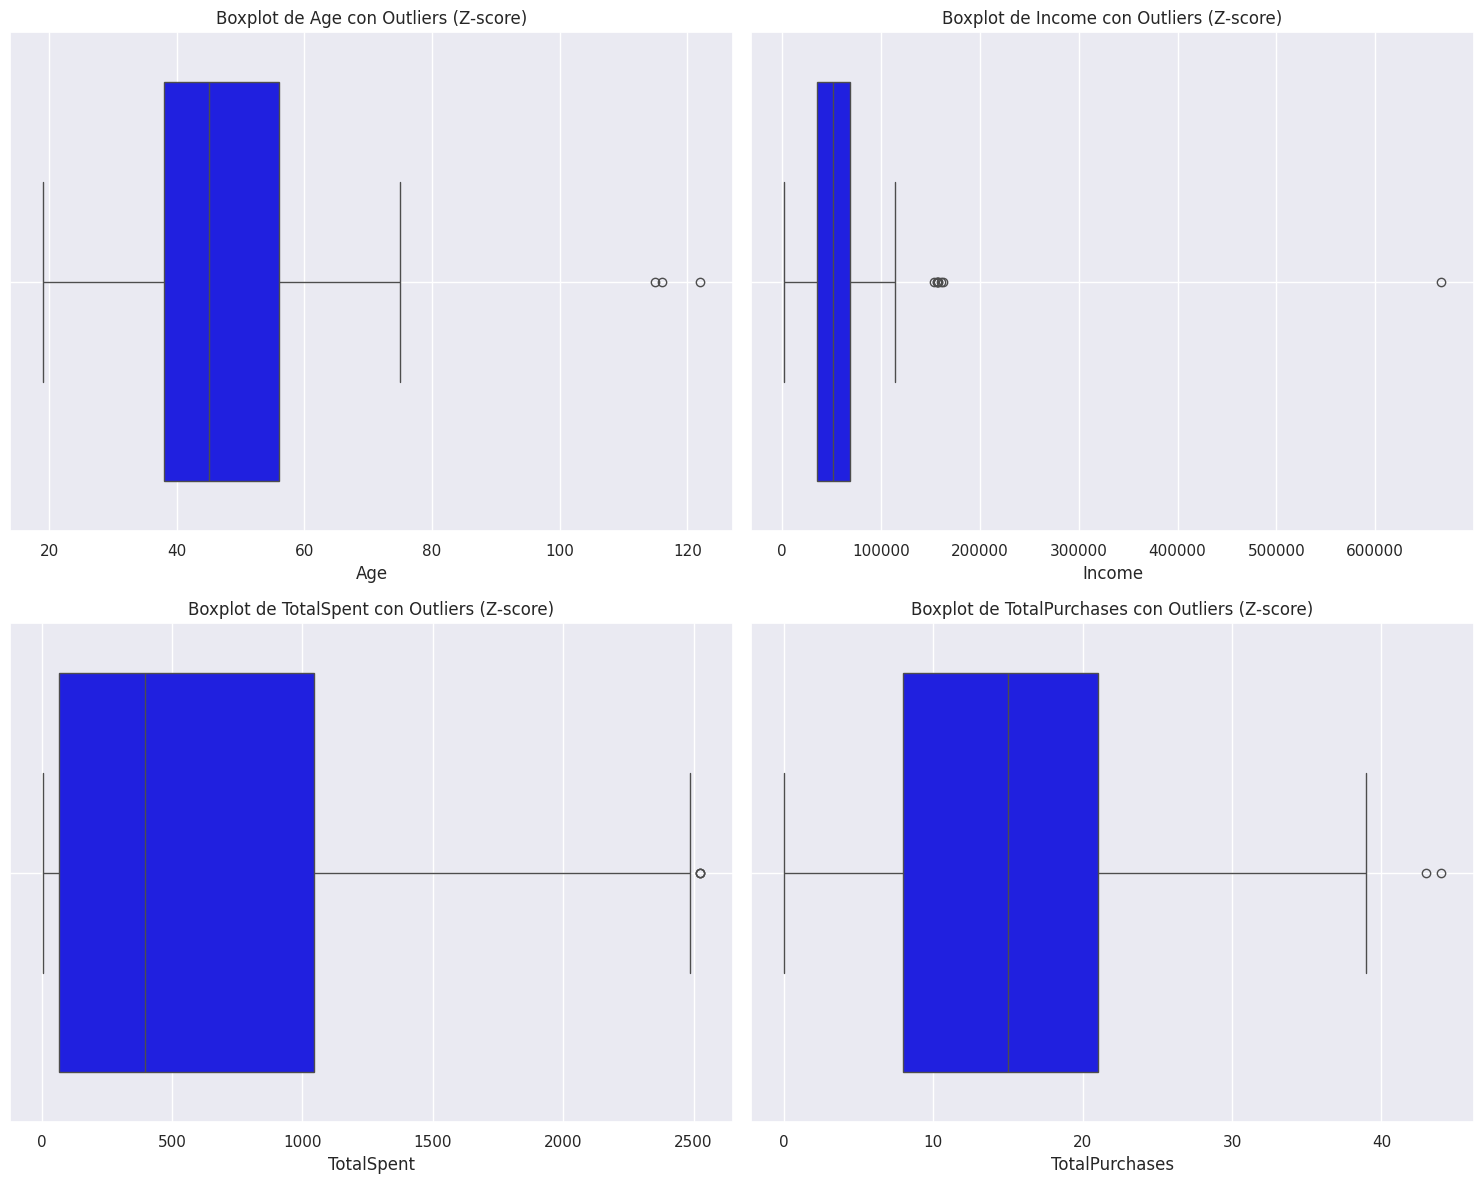

In [52]:
# IDENTIFICANDO OUTLIERS CON METODO ZCORE
from scipy.stats import zscore
def detectar_outliers_zscore(df, variables, umbral=3):
    outliers = {}
    for var in variables:
        z_scores = zscore(df[var])
        outliers[var] = df[np.abs(z_scores) > umbral]
    return outliers

variables_numericas = ['Age', 'Income', 'TotalSpent', 'TotalPurchases']

# DETECTA OUTLIERS
outliers_zscore = detectar_outliers_zscore(df, variables_numericas)

for var in outliers_zscore:
    print(f"\nOutliers detectados en '{var}' usando Z-score:")
    print(outliers_zscore[var][var])

# VISUALIZACION DE OUTLIERS
plt.figure(figsize=(15, 12))
for i, var in enumerate(variables_numericas):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[var], color='blue')
    plt.title(f'Boxplot de {var} con Outliers (Z-score)')
    plt.grid(True)

plt.tight_layout()
plt.show()




4. ANÁLISIS DE CORRELACIÓN Y RELACIONES ENTRE VARIABLES

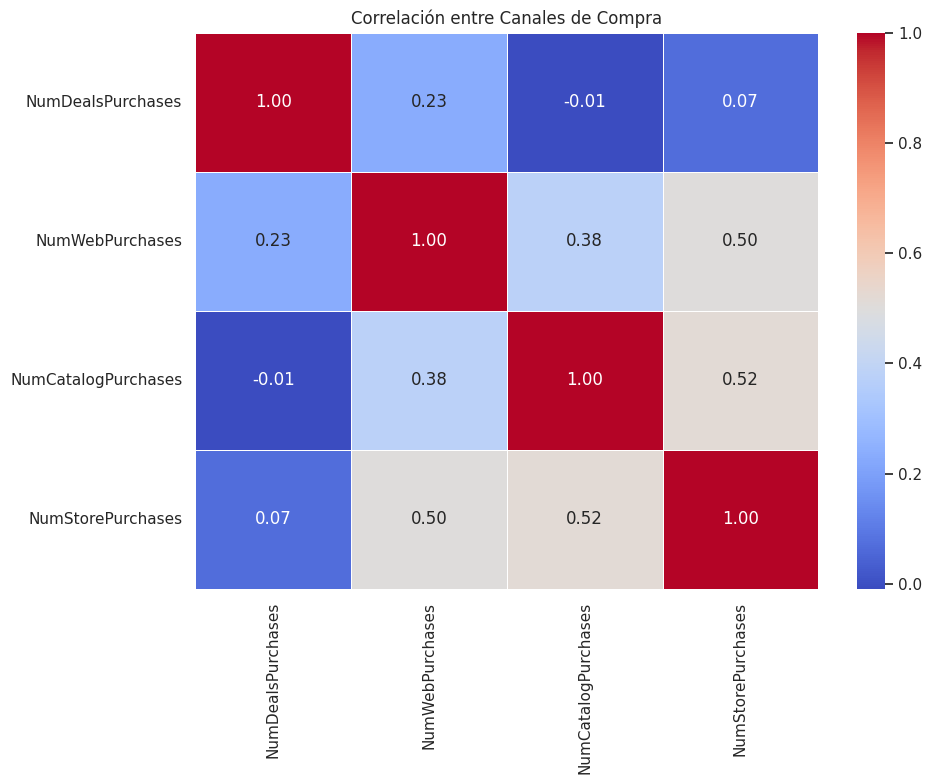

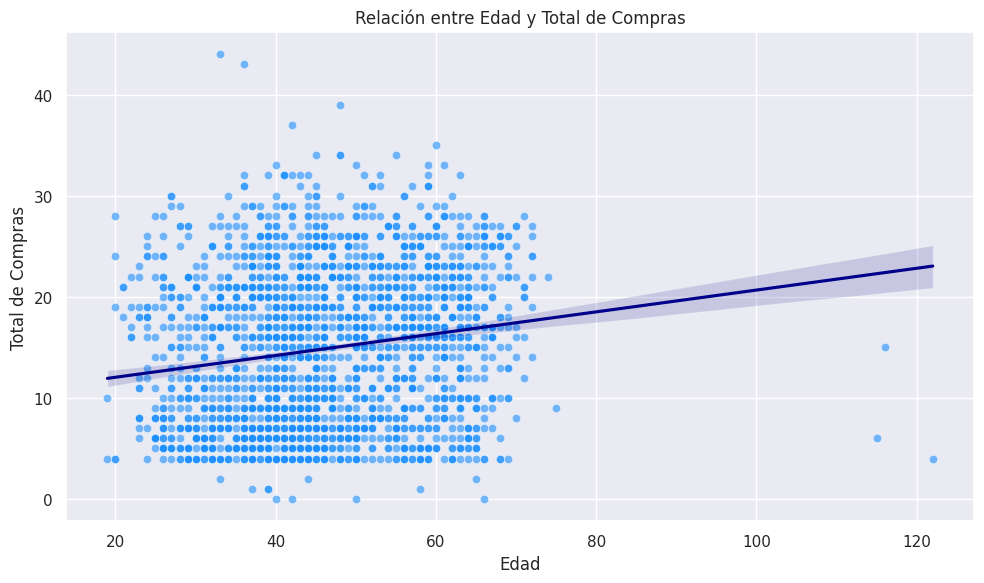

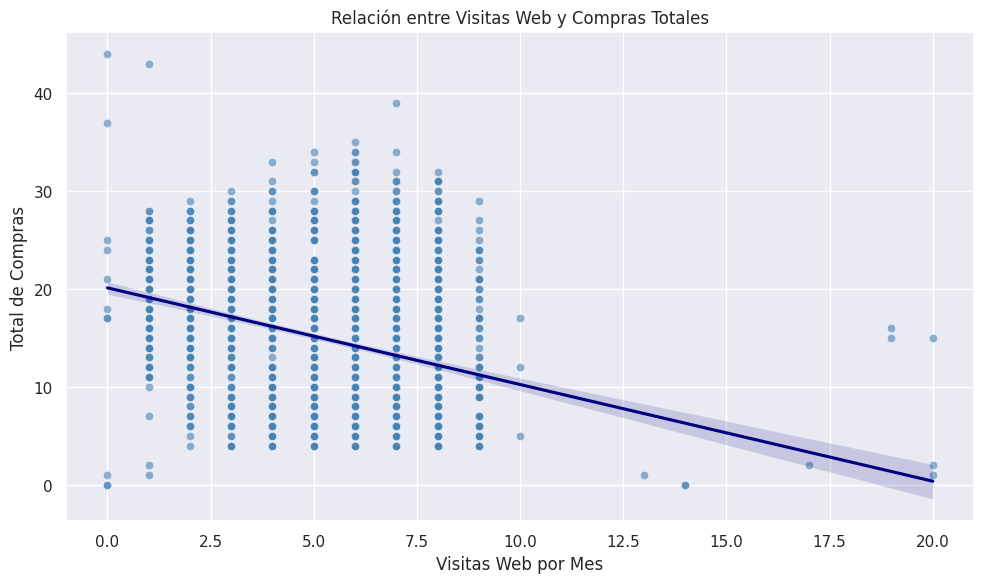

In [58]:
#CORRELACIÓN ENTRE CANALES DE COMPRA

channel_cols = [
    'NumDealsPurchases',      # Compras con descuentos
    'NumWebPurchases',        # Compras online
    'NumCatalogPurchases',    # Compras por catálogo
    'NumStorePurchases'       # Compras en tienda física
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[channel_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre Canales de Compra')
plt.tight_layout()
plt.savefig('correlacion_canales_compra.png')
plt.show()

print("\n" )

#RELACION ENTRE EDAD Y FRECUENCIA DE COMPRA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalPurchases', data=df, color='dodgerblue', alpha=0.6)
sns.regplot(x='Age', y='TotalPurchases', data=df, scatter=False, color='darkblue')
plt.title('Relación entre Edad y Total de Compras')
plt.xlabel('Edad')
plt.ylabel('Total de Compras')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n ")

#CORRELACION ENTRE VISITAS WEB Y COMPRAS WEB
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='TotalPurchases', data=df, color='steelblue', alpha=0.6)
sns.regplot(x='NumWebVisitsMonth', y='TotalPurchases', data=df, scatter=False, color='navy')
plt.title('Relación entre Visitas Web y Compras Totales')
plt.xlabel('Visitas Web por Mes')
plt.ylabel('Total de Compras')
plt.grid(True)
plt.tight_layout()
plt.show()




5. ANÁLISIS DE PARTICIPACIÓN EN MULTIPLES CAMPAÑAS

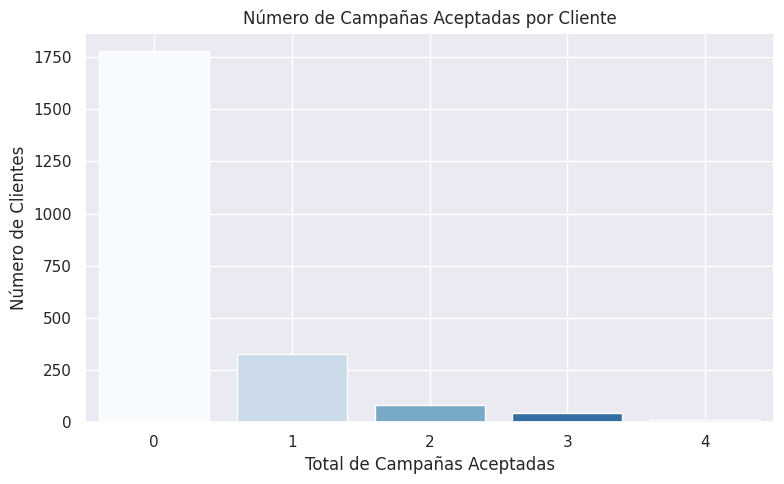

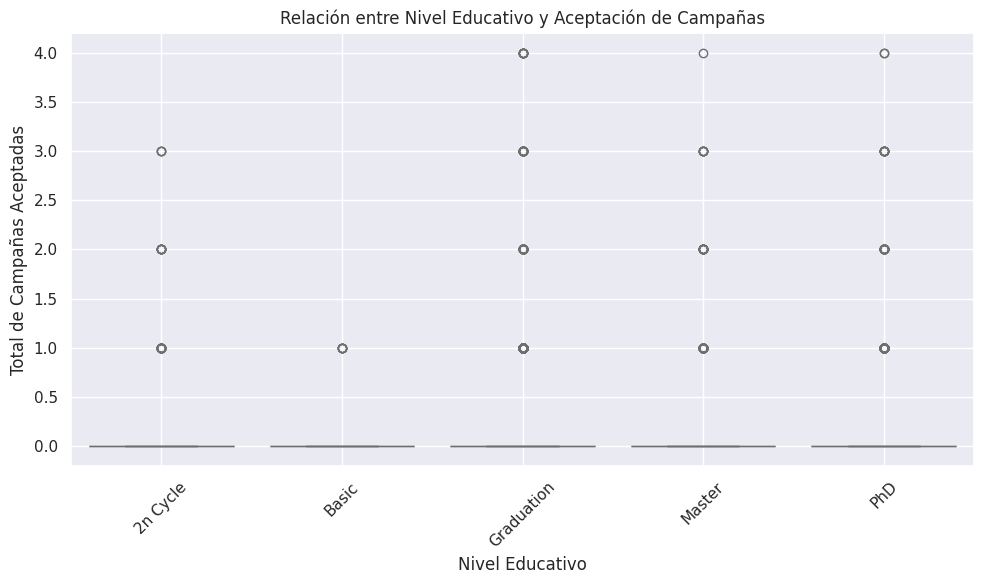

In [64]:
#DISTRIBUCIÓN DEL TOTAL DE CAMPAÑAS ACEPTADAS
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                             'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
plt.figure(figsize=(8, 5))
sns.countplot(x='TotalAcceptedCmp', data=df, hue='TotalAcceptedCmp', palette='Blues', legend=False)
plt.title('Número de Campañas Aceptadas por Cliente')
plt.xlabel('Total de Campañas Aceptadas')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.tight_layout()
plt.savefig('campanas_aceptadas_total.png')
plt.show()


print("\n ")
# RELACIÓN ENTRE EDUACIÓN Y ACEPTACIÓN DE CAMPAÑAS
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='TotalAcceptedCmp', data=df, hue='Education', palette='pastel', dodge=False, legend=False)
plt.title('Relación entre Nivel Educativo y Aceptación de Campañas')
plt.ylabel('Total de Campañas Aceptadas')
plt.xlabel('Nivel Educativo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('educacion_vs_campanas.png')
plt.show()


6. PRINCIPALES HALLAZGOS Y CONCLUSIÓN \




In [78]:
print("\n PRINCIPALES HALLAZGOS Y CONCLUSIÓN \n")

# 1. DISTRIBUCIÓN DE VARIABLES NUMERICAS CLAVE
print("1. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CLAVE:")
for var in ['Age', 'Income', 'TotalSpent', 'TotalPurchases']:
    media = df[var].mean()
    mediana = df[var].median()
    moda = get_mode(df[var])
    skew = df[var].skew()
    tipo = "simétrica" if abs(skew) < 0.5 else "sesgada a la derecha" if skew > 0 else "sesgada a la izquierda"
    print(f"   - {var}: distribución {tipo} (skew = {skew:.2f})")
    print(f"     Media: {media:.2f}, Mediana: {mediana:.2f}, Moda: {moda:.2f}")

# 2. ANÁLISIS DE VISITAS AL SITIO WEB
print("\n2. ANÁLISIS DE VISITAS AL SITIO WEB:")
web_visits_avg = df['NumWebVisitsMonth'].mean()
print(f"   - Promedio de visitas al sitio web por mes: {web_visits_avg:.2f}")
print("   - Clientes que visitan frecuentemente (más de 10 veces/mes):",
      (df['NumWebVisitsMonth'] > 10).sum())
print("   - Correlación con compras web: {:.2f}".format(
    df['NumWebVisitsMonth'].corr(df['NumWebPurchases'])))

# 3. ANÁLISIS DE GASTOS POR TIPO PRODUCTO
print("\n3. GASTOS POR TIPO DE PRODUCTO:")
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_avg = df[spending_cols].mean().sort_values(ascending=False)
for prod, amount in spending_avg.items():
    print(f"   - {prod}: ${amount:.2f}")

# 4. ANÁLSIS TOTAL DE COMPRAS
print("\n4. ANÁLISIS DE TOTAL DE COMPRAS:")
print(f"   - Promedio total de compras por cliente: {df['TotalPurchases'].mean():.2f}")
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
channel_avg = df[channels].mean()
for c in channels:
    print(f"   - {c}: {channel_avg[c]:.2f} ({channel_avg[c]/df['TotalPurchases'].mean()*100:.1f}% del total)")

# 5. ANÁLISIS DE VALORES ATÍPICOS
print("\n5. ANÁLISIS DE VALORES ATÍPICOS (Z-SCORE):")
from scipy.stats import zscore
for var in ['Age', 'Income', 'TotalSpent', 'TotalPurchases']:
    zscores = zscore(df[var])
    outliers = df[np.abs(zscores) > 3]
    print(f"   - {var}: {len(outliers)} outliers identificados ({len(outliers)/len(df)*100:.2f}%)")

# 6. CORRELACIÓN Y RELACIONES ENTRE VARIABLES
print("\n6. CORRELACIÓN Y RELACIONES ENTRE VARIABLES:")
vars_corr = ['Age', 'Income', 'TotalSpent', 'TotalPurchases', 'NumWebVisitsMonth', 'NumAcceptedCmps']
corr_matrix = df[vars_corr].corr()
strong_corrs = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1)].stack()
if not strong_corrs.empty:
    print("   - Relaciones con alta correlación positiva:")
    for idx, value in strong_corrs.items():
        print(f"     * {idx[0]} y {idx[1]}: correlación = {value:.2f}")
else:
    print("   - No se identificaron correlaciones mayores a 0.5 entre las variables seleccionadas.")

# 7. PARTICIPACIÓN EN CAMPAÑAS Y RELACION CON EDUCACIÓN
education_cmp_percent = df.groupby('Education', observed=True)['TotalAcceptedCmp'].mean() * 100
print("\n7. PARTICIPACIÓN EN CAMPAÑAS Y RELACIÓN CON EDUCACIÓN:")
print(f"   - TotalAcceptedCmp (campañas aceptadas) promedio por cliente: {df['TotalAcceptedCmp'].mean():.2f}")
print(f"   - Educación con mayor aceptación a campañas:")
for edu, percent in education_cmp_percent.sort_values(ascending=False).items():
    print(f"     * {edu}: {percent:.2f}% de aceptación a campañas")




 PRINCIPALES HALLAZGOS Y CONCLUSIÓN 

1. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CLAVE:
   - Age: distribución simétrica (skew = 0.35)
     Media: 46.19, Mediana: 45.00, Moda: 39.00
   - Income: distribución sesgada a la derecha (skew = 6.80)
     Media: 52237.98, Mediana: 51381.50, Moda: 51381.50
   - TotalSpent: distribución sesgada a la derecha (skew = 0.86)
     Media: 605.80, Mediana: 396.00, Moda: 46.00
   - TotalPurchases: distribución simétrica (skew = 0.25)
     Media: 14.86, Mediana: 15.00, Moda: 7.00

2. ANÁLISIS DE VISITAS AL SITIO WEB:
   - Promedio de visitas al sitio web por mes: 5.32
   - Clientes que visitan frecuentemente (más de 10 veces/mes): 9
   - Correlación con compras web: -0.06

3. GASTOS POR TIPO DE PRODUCTO:
   - MntWines: $303.94
   - MntMeatProducts: $166.95
   - MntGoldProds: $44.02
   - MntFishProducts: $37.53
   - MntSweetProducts: $27.06
   - MntFruits: $26.30

4. ANÁLISIS DE TOTAL DE COMPRAS:
   - Promedio total de compras por cliente: 14.86
   - NumWebP